Date: 25/07/2021

Name: Nikita Sunil Patil

Email_id: patilnikita7188@gmail.com



*   Read Titanic data given in the data set folder

1) Create the user defined function to handle null values.

2) Handle null values using sklearn imputer package

3) change categorical values to numeric using:  np.where(), label encoder, get dummies, one hot encoder and column transformation

4) check if data is clean and ready to implement algorithm

5) Implement leave one out , k-fold, stratified k-fold, train test split

6) Scale the data (Standard scaler, MinMax ...etc... )

7) Implement suitable machine learning algorithm.

8) Compare different algorithm

# data : 
survival :	Survival	[0 = No, 1 = Yes]
pclass :	Ticket class	[1 = 1st, 2 = 2nd, 3 = 3rd]
sex	: Sex	
Age	: Age in years	
sibsp	: # of siblings / spouses aboard the Titanic	
parch	: # of parents / children aboard the Titanic	
ticket :	Ticket number	
fare : Passenger fare	
cabin : Cabin number	
embarked : Port of Embarkation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
from math import *
import operator
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv(r'/content/titanic_train.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above table describe following concepts : Count , mean , std , minimum , Q1 (25%) , Q2 (50%) , Q3 (75%) and maximum values for Passengers , Survived , Pclass , Age , Sibsp , Parch and Fare respectively.

In [ ]:
data.shape

(891, 12)

given data having 12 variables with 891 observations.

In [ ]:
print("Titanic train data contains : " + "891" + " rows / observations and " + "12" + " columns")

Titanic train data contains : 891 rows / observations and 12 columns


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The titanic train data set contain following data types :

1) Integer data type : PassengerId , Survived , Pclass , SibSP , Parch

2) Object data type :  Name , Sex , Ticket , Cabin and Embarked

3) float data type : Age , Fare 

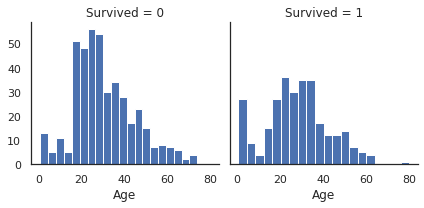

In [ ]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Above histogram gives informaion of survived and death people. 0 indicate people who are death and 1 indicates people are lived according to there age . The maximum amount of death accure is of 30age group and maximum people who survived are of 20 Age.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


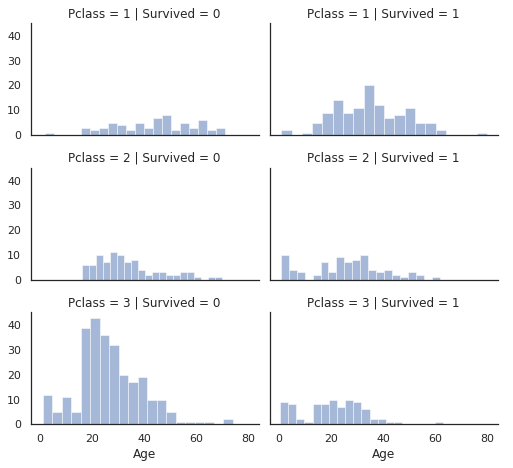

In [ ]:
# grid = sns.FacetGrid(data, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


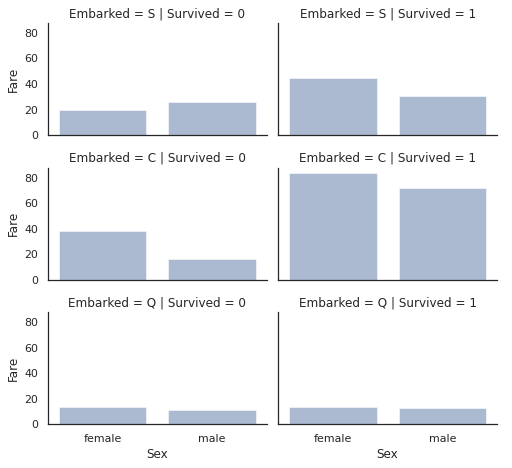

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Age having 177 null values where cabin and embarked having 687 and 2 null values respectively


In [ ]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df = data.groupby(['Pclass']).mean()
df

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
data['Age'] = data[['Age', 'Pclass']].apply(age_approx, axis=1)
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data[data['Pclass']== 1]['Age'].mean()

38.06212962962963

In [ ]:
data[data['Pclass']== 2]['Age'].mean()

29.82516304347826

In [ ]:
data[data['Pclass']== 3]['Age'].mean()

24.82468431771894

In [ ]:
data['Age'].value_counts()

24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
        ... 
36.50      1
70.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

After filling all null values Embarked shows 2 null values 

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

And here we drop that null values.

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
feature_col=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x=feature_col
y=data.Survived

## Set up the LeaveOneOut
loo=LeaveOneOut()

## To find train and test values by using  LeaveOneOut
for train,test in loo.split(x,y) :
    print('%s %s' % (train,test))

Streaming output truncated to the last 5000 lines.
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
feature_col=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

x=feature_col
y=data.Survived

kf=KFold()

for train,test in kf.split(x,y) :
    print('%s %s' % (train,test))

[178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411
 412 413 414 415 416 417 418 419 420 421 422 423 42

In [ ]:
feature_col=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

x=feature_col
y=data.Survived

skf=StratifiedKFold()

for train,test in skf.split(x,y) :
    print('%s %s' % (train,test))

[167 168 169 170 172 173 174 175 176 177 178 179 180 181 184 187 188 190
 195 196 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411
 412 413 414 415 416 417 418 419 420 421 422 423 42

In [ ]:
#pd.get_dummies(data['Sex'], drop_first=True)
data_dummied = pd.get_dummies(data, columns=["Sex"])
data_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [ ]:
data_dummied = pd.get_dummies(data_dummied, columns=["Embarked"])

In [ ]:
data_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


If we see above correlation diagram , then we can conclude that there is no any correlation between all variables with Survived except Fare.

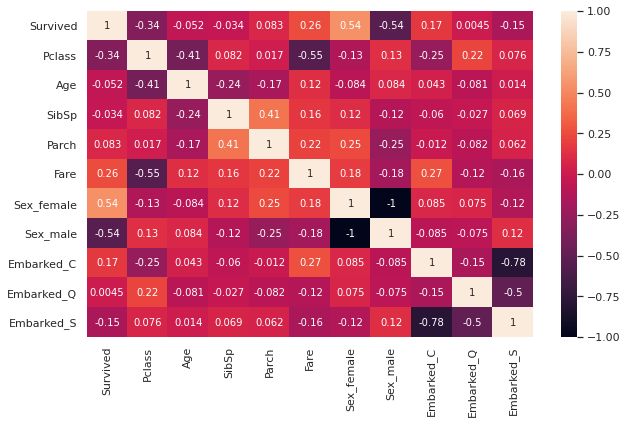

In [ ]:
# Checking for independence between features
plt.figure(figsize=(10,6))
sns.heatmap(data_dummied.corr(),annot= True)  

In [ ]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Sex_female",
    "Sex_male",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

X = data_dummied[used_features].values
print(type(X))
y = data_dummied['Survived']
type(y)

<class 'numpy.ndarray'>


pandas.core.series.Series

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset in training and test datasets
# X_train, X_test = train_test_split(df_train, test_size=0.5, random_state=int(time.time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
LogReg = LogisticRegression()

In [ ]:
# Train classifier
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=LogReg.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1])

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  19],
       [ 23,  83]])

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8426966292134831

In [ ]:
len(X_test)

267

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       161
           1       0.81      0.78      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [ ]:
LogReg.coef_

array([[-1.17250282, -0.03826797, -0.24971342, -0.14286643,  1.18680666,
        -1.18921233,  0.19269809,  0.12334361, -0.31844737]])

In [ ]:
LogReg.intercept_

array([3.90489824])

In [ ]:
data_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
LogReg.predict_proba(X_test)

array([[0.36094065, 0.63905935],
       [0.93254929, 0.06745071],
       [0.54764974, 0.45235026],
       [0.48009865, 0.51990135],
       [0.84181152, 0.15818848],
       [0.84386221, 0.15613779],
       [0.56133993, 0.43866007],
       [0.14035246, 0.85964754],
       [0.06747125, 0.93252875],
       [0.8315861 , 0.1684139 ],
       [0.55482303, 0.44517697],
       [0.86381699, 0.13618301],
       [0.8315861 , 0.1684139 ],
       [0.15633976, 0.84366024],
       [0.23274514, 0.76725486],
       [0.85285405, 0.14714595],
       [0.86373019, 0.13626981],
       [0.57854051, 0.42145949],
       [0.07381194, 0.92618806],
       [0.9125236 , 0.0874764 ],
       [0.41138706, 0.58861294],
       [0.62990963, 0.37009037],
       [0.8725724 , 0.1274276 ],
       [0.81015533, 0.18984467],
       [0.88480095, 0.11519905],
       [0.8897387 , 0.1102613 ],
       [0.88480095, 0.11519905],
       [0.47129046, 0.52870954],
       [0.69591714, 0.30408286],
       [0.9340531 , 0.0659469 ],
       [0.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.53

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.89

In [ ]:
# to making Decision tree diagram
dtclf = DecisionTreeClassifier(criterion = 'entropy')
data.drop('SibSp',1,inplace=True)

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.89

In [ ]:
# SVC
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
y_pred_lsvc = LSVC.predict(X_test)
LSVC_score = LSVC.score(X_train, y_train)
print("GNB accuracy score = {:.2f}".format(LSVC_score*100))

GNB accuracy score = 76.05


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# knn

KNN = KNeighborsClassifier()
model_6 = KNN.fit(X_train,y_train)
prediction_6 = model_6.predict(X_test)
cm_6 = confusion_matrix(y_test,prediction_6)
cm_6

array([[138,  23],
       [ 37,  69]])

In [ ]:
print('Accuracy : ', accuracy_score(y_test,prediction_6))

Accuracy :  0.7752808988764045


In [ ]:
print(classification_report(y_test,prediction_6))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       161
           1       0.75      0.65      0.70       106

    accuracy                           0.78       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.77      0.78      0.77       267

